# ML-2. Предобработка данных 
## Юнит 3. Введение в машинное обучение 
### Skillfactory: DSPR-19

### 2.3. Типы данных. Практика

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
import matplotlib.pyplot as plt 
import seaborn as sns 
%matplotlib inline

In [4]:
# Давайте для начала откроем наш файл и посмотрим на данные:

data = pd.read_csv('data_flats.csv',sep=";")
data.head()

,id,full_sq,life_sq,floor,sub_area,preschool_quota,preschool_education_centers_raion,school_quota,school_education_centers_raion,school_education_centers_top_20_raion,...,shopping_centers_km,office_km,additional_education_km,preschool_km,big_church_km,church_synagogue_km,theater_km,museum_km,ecology,price_doc
0,1,43,27.0,4.0,Bibirevo,5001.0,5,11065.0,5,0,...,0.648488,0.637189,0.947962,0.177975,0.625783,0.628187,14.053047,7.389498,good,5850000
1,2,34,19.0,3.0,Nagatinskij Zaton,3119.0,5,6237.0,8,0,...,0.519311,0.688796,1.072315,0.273345,0.967821,0.471447,6.829889,0.709260,excellent,6000000
2,3,43,29.0,2.0,Tekstil'shhiki,1463.0,4,5580.0,7,0,...,1.486533,1.543049,0.391957,0.158072,3.178751,0.755946,4.273200,3.156423,poor,5700000
3,4,89,50.0,9.0,Mitino,6839.0,9,17063.0,10,0,...,0.599914,0.934273,0.892674,0.236455,1.031777,1.561505,16.990677,16.041521,good,13100000
4,5,77,77.0,4.0,Basmannoe,3240.0,7,7770.0,9,0,...,0.429052,0.077901,0.810801,0.376838,0.378756,0.121681,1.112486,1.800125,excellent,16331452


In [3]:
# Для того, чтобы посмотреть на типы данных, запросим информацию о датасете:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30469 entries, 0 to 30468
Data columns (total 56 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     30469 non-null  int64  
 1   full_sq                                30469 non-null  int64  
 2   life_sq                                24086 non-null  float64
 3   floor                                  30302 non-null  float64
 4   sub_area                               30469 non-null  object 
 5   preschool_quota                        23781 non-null  float64
 6   preschool_education_centers_raion      30469 non-null  int64  
 7   school_quota                           23784 non-null  float64
 8   school_education_centers_raion         30469 non-null  int64  
 9   school_education_centers_top_20_raion  30469 non-null  int64  
 10  hospital_beds_raion                    16029 non-null  float64
 11  he

### Задание 2.3.1

Введите название переменной, которой обозначен ординальный признак  
- ecology   

Введите название переменной, которой обозначен категориальный признак
- sub_area  

!!!Обратите внимание на типы признаков. Категориальные и ординальные чаще всего закодированы как признаки типа "object" (но помните, что иногда категориальные и ординальные могут быть закодированы и числами, поэтому в будущем всегда внимательно смотрите на полученные данные!)

### 2.6 Работа с пропусками. 

### Практика. Обработка пропусков


In [6]:
import pandas as pd
import numpy as np

Создадим и выведем небольшой набор тестовых данных.

In [8]:
test_data = pd.DataFrame([[1, 2, np.nan], [3, np.nan, 4], 
                          [0, 1, 2]], columns=['one', 'two', 'three'])

In [9]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,4.0
2,0,1.0,2.0


### Поиск пропусков

В данных часто бывают пропуски. В Pandas их можно находить с помощью метода `.isna()`:

In [10]:
test_data.isna()

,one,two,three
0,False,False,True
1,False,True,False
2,False,False,False


Можно находить пропуски в пределах одного признака (столбца):

In [12]:
test_data['two'].isna()

0    False
1     True
2    False
Name: two, dtype: bool

### Удаление столбцов/строк с пропусками

С помощью метода `.dropna()` можно удалять столбцы/строки с пропусками, указывая ось с помощью параметра `axis`.  
Если нужно удалить строки, в которых встречается пропуск (NaN), `axis=0`:


In [13]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,4.0
2,0,1.0,2.0


In [14]:
test_data.dropna(axis=0)

,one,two,three
2,0,1.0,2.0


Если нужно удалить столбцы, в которых встречается пропуск (NaN), `axis=1`:

In [15]:
test_data.dropna(axis=1)

,one
0,1
1,3
2,0


По умолчанию, параметр `axis` равен 0:

In [17]:
test_data.dropna()

,one,two,three
2,0,1.0,2.0


Если нужно удалить пропуски только для определенных столбцов (или строк, при указании другого значения параметра `axis`), нужно передать список индексов (номеров строк или названий столбцов) столбцов (или строк) в параметр `subset`:

In [18]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,4.0
2,0,1.0,2.0


In [19]:
test_data.dropna(subset=[0], axis=1)

,one,two
0,1,2.0
1,3,NaN
2,0,1.0


In [20]:
test_data.dropna(subset=['two'], axis=0)

,one,two,three
0,1,2.0,NaN
2,0,1.0,2.0


### Заполнение статистиками

Иногда удаление строк/столбцов с пропусками - слишком грубое решение. Можно заменять пропуски статистиками или каким-то константным значением с помощью метода `fillna()`:

In [21]:
# По умолчанию заменяет все пропуски
test_data.fillna(-1)

,one,two,three
0,1,2.0,-1.0
1,3,-1.0,4.0
2,0,1.0,2.0


Можно заменять разными статистиками, например:
 - среднее значение, `np.mean()`
 - максимальное значение, `np.max()`
 - минимальное значение, `np.min()`
 - медиана, `np.median()`


In [22]:
max_two = np.max(test_data['two'])
test_data['two'].fillna(max_two)

0    2.0
1    2.0
2    1.0
Name: two, dtype: float64

Методы типа `np.mean()` можно вызывать у самих столбцов с помощью `column.mean()`:

In [23]:
test_data['three'].fillna(test_data['three'].mean())

0    3.0
1    4.0
2    2.0
Name: three, dtype: float64

### Задание 2.6.6
Загрузите данные train.csv, найдите признак, обозначающий штат. Затем найдите значение, которое встречается чаще всего. Замените пропуски этим значением и запишите получившийся признак в переменную result.

In [27]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
vis_data

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0
2,22062,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","SANDERS, DERRON",1449.0,LONGFELLOW,NaN,23658.0,P.O. BOX,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
3,22084,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","MOROSI, MIKE",1441.0,LONGFELLOW,NaN,5.0,ST. CLAIR,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
4,22093,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","NATHANIEL, NEAL",2449.0,CHURCHILL,NaN,7449.0,CHURCHILL,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250301,325555,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,SANTA MARIA,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250302,325557,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250303,325562,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN
250304,325559,"Buildings, Safety Engineering & Env Department","Bush, Wesley",WESTGATE TERRACE APARTMENTS LLC,10701.0,MEYERS RD,NaN,1715.0,MEYERS,DETROIT,...,0.0,0.0,0.0,0.0,NaN,NO PAYMENT APPLIED,NaN,NaN,not responsible by disposition,NaN


In [32]:
vis_data.state.value_counts()

MI    228601
CA      5020
TX      2420
FL      2237
IL      1310
SC      1304
OH       967
NY       673
MN       632
GA       535
NV       484
UT       477
PA       466
NJ       395
VA       385
NC       353
MD       349
AZ       329
ME       261
OK       248
AL       215
TN       207
WA       192
MA       182
IA       159
WI       159
OR       153
MO       151
CO       147
KY       146
IN       106
AR        82
LA        81
AK        79
UK        77
NB        77
MS        64
CT        60
DC        58
ON        51
DE        50
KS        37
RI        35
SD        33
ID        33
MT        28
NM        21
BC        17
WY        12
HI        10
NH         9
VT         7
VI         6
WV         6
PR         5
QC         5
QL         3
BL         2
ND         2
Name: state, dtype: int64

In [31]:
result = vis_data.state.fillna(vis_data.state.value_counts().index[0])
result

0         IL
1         MI
2         MI
3         MI
4         MI
          ..
250301    MI
250302    MI
250303    MI
250304    MI
250305    MI
Name: state, Length: 250306, dtype: object

### Задание 2.6.7
Продолжим готовить к анализу наш Data set, посвященный квартирам, выставленным на продажу. Избавимся от пропусков. Просто удалять данные с пропусками довольно грубо. Однако если у вас большое количество объектов, и лишь крайне малая их доля имеет пропущенные значения, то это возможное допущение. Поступим здесь таким образом. Нас будут интересовать только те квартиры, про которые продавцы заполнили все данные. Удалите, пожалуйста, все строки, где есть хотя бы один пропуск. Сколько объектов осталось?

In [33]:
temp = len(data.dropna())
temp

13652

### 2.8. Начальная обработка. Практика


### Нормализация данных и удаление данных

In [34]:
import pandas as pd
import numpy as np

In [35]:
test_data = pd.DataFrame([[1, 2, np.nan], [3, np.nan, 417], 
                          [0, 10, -212]], columns=['one', 'two', 'three'])

In [36]:
test_data

,one,two,three
0,1,2.0,NaN
1,3,NaN,417.0
2,0,10.0,-212.0


## Нормализация: теория

Некоторые алгоритмы обращают внимание на масштаб переменных - это помогает алгоритму (например, градиентному спуску) лучше сходиться. Для этого нужно делать нормализацию данных - приведение переменных к одному масштабу.  
Кроме этого, если есть несколько наборов данных одной природы, но разного размера, их нужно нормализовать, чтобы иметь возможность сравнить влияние каких-то других признаков.  
Несмотря на то, что некоторые алгоритмы работают независимо от масштаба признаков, хуже от нормализации обычно не становится.  
Когда мы говорим о нормализации, мы говорим о числах.   
Мы посмотрим на работу методов нормализации из библиотеки `sklearn`. На вход будем подавать `pandas.DataFrame`, на выходе будем получать `np.ndarray`. Информация о структуре `pandas`-таблицы теряется.

## minmax нормализация

Одним из стандартных способов нормализации является `minmax` нормализация.  
Данный вид нормализации приводит независимо каждый признак к значению между 0 и 1.  
Как это работает? Для каждого признака алгоритм находит минимальное ($x_{min}$) и максимальное ($x_{max}$) значение, после этого признак `x` трансформируется в $$x := \frac{x - x_{min}}{x_{max} - x_{min}}$$

In [38]:
test_data = test_data.fillna(0)

In [39]:
test_data

,one,two,three
0,1,2.0,0.0
1,3,0.0,417.0
2,0,10.0,-212.0


In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler = MinMaxScaler()
scaler.fit_transform(test_data)

array([[0.33333333, 0.2       , 0.33704293],
       [1.        , 0.        , 1.        ],
       [0.        , 1.        , 0.        ]])

## std нормализация (стандартная нормализация)

`std` нормализация (иначе называется `стандартная нормализация` или `zero mean, unit variance`) - еще один вид нормализации признаков.  
Как он работает? Для каждого признака алгоритм независимо находит среднее значение ($x_{mean}$) и стандартное отклонение ($x_{std}$), после этого признак `x` трансформируется в $$x := \frac{x - x_{mean}}{x_{std}}$$

In [42]:
from sklearn.preprocessing import StandardScaler

In [43]:
scaler = StandardScaler()
scaler.fit_transform(test_data)

array([[-0.26726124, -0.46291005, -0.26151831],
       [ 1.33630621, -0.9258201 ,  1.33438124],
       [-1.06904497,  1.38873015, -1.07286293]])

`MinMaxScaler` и `StandardScaler` сохраняют параметры, с которыми проводит нормализацию. Это значит, что после нормализации признаков в тренировочной выборке нужно будет применить ту же нормализацию с валидационными и тестовыми данными. Про валидацию мы поговорим позже.

## Удаление ненужных строк и столбцов

Иногда в данных находятся признаки (столбцы), которые не несут никакой полезной информации или были считаны по ошибке.  
Их можно можно удалить с помощью метода `.drop(column_names, axis=1)`. В `columns` необходимо передать или название признака (столбца), или список названий признаков (столбцов):

In [44]:
test_data

,one,two,three
0,1,2.0,0.0
1,3,0.0,417.0
2,0,10.0,-212.0


In [45]:
test_data.drop('one', axis=1)

,two,three
0,2.0,0.0
1,0.0,417.0
2,10.0,-212.0


In [46]:
test_data.drop(['one', 'three'], axis=1)

,two
0,2.0
1,0.0
2,10.0


Если в предыдущем методе в параметр `axis` передавать `0`, метод будет удалять строки с номерами, которые вы передадите (или один номер, или список номеров):

In [48]:
test_data.drop(0, axis=0)

,one,two,three
1,3,0.0,417.0
2,0,10.0,-212.0


In [49]:
test_data.drop([0, 2], axis=0)

,one,two,three
1,3,0.0,417.0


### Задание 2.8.3
Загрузите данные train.csv, найдите признак, обозначающий баланс. Нормализуйте признак с помощью std-нормализации. Проверьте, что вы нашли нужный признак и нормализовали его подходящим методом. Метод для нормализации принимает матрицу, а не массив. В numpy можно превратить массив в матрицу с помощью reshape(). В качестве ответа укажите минимальное значение в получившемся нормализованном признаке. Ответ округлите до 5 знаков после запятой.

In [50]:
vis_data = pd.read_csv("train.csv", encoding = 'ISO-8859-1', low_memory = False)
test_df = np.array(vis_data['balance_due'])

temp = scaler.fit_transform(test_df.reshape(-1,1)).min()
print(round(temp,5))

-13.14733


### 2.9. Визуализация
### Задание 2.9.1
С помощью какого графика нагляднее всего можно показать нормализованные данные?  
Ответ:  
- Гистограмма 

### Задание 2.9.2
Что позволяет сделать гистограмма?  
Ответ:  
- распределить данные
- выделить неверные значения
- сделать данные понятными визуально

### Задание 2.9.3
Выберите из списка значения, которые имеют абсолютную корреляцию выше 0.5?  
Ответ:  
- 0.7
- -0.69

### Задание 2.9.4
Если зависимость большая и линейная, то какие будут значения корреляции?  
Ответ:  
- Большие верно




### 2.10 Визуализация. Практика
### Визуализация для предобработки
### Гистограмма
Гистограмма показывает распределение данных. С помощью нее можно увидеть, как распределены данные, есть ли выбросы.  
Загрузим данные:

In [52]:
import numpy as np
import pandas as pd
%matplotlib inline
vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,violation_zip_code,mailing_address_str_number,mailing_address_str_name,city,...,clean_up_cost,judgment_amount,payment_amount,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,NaN,3.0,S. WICKER,CHICAGO,...,0.0,305.0,0.0,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,NaN,2959.0,Martin Luther King,Detroit,...,0.0,855.0,780.0,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0


Один из начальных этапов работы с данных - визуализация и поиск проблем, которые можно решить. О визуализации в целом мы поговорим позже, здесь мы обсудим применение в контексте предобработки.  
Многие алгоритмы работают лучше, когда на вход принимают данные, распределенные нормально.  
Посмотрим на гистограмму какого-нибудь из признаков. Для удобства оставим только значения больше 0.  
**Совет** - на деле удаление из рассмотрения значений меньше 0 является не удобством, а необходимостью. Например, если признак обозначает выплату зарплаты, он не может быть меньше 0; тогда любые значения меньше 0 являются выбросами, мы поговорим о них чуть позже. 

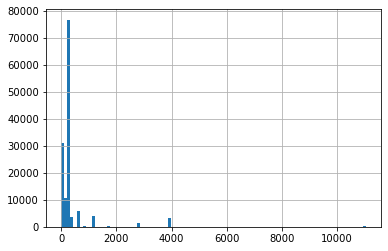

In [53]:
vis_data.balance_due[vis_data.balance_due > 0].hist(bins=100);

Одним из способов сделать данные более "нормальными" является взятие логарифма.  
При этом, не должно быть значений, равных 0, иначе метод `np.log` выдаст $-\infty$.

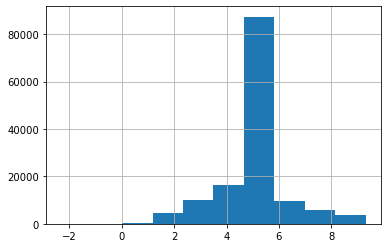

In [54]:
np.log(vis_data.balance_due[vis_data.balance_due > 0]).hist();

Другим способом является взятие квадратного корня от данных:

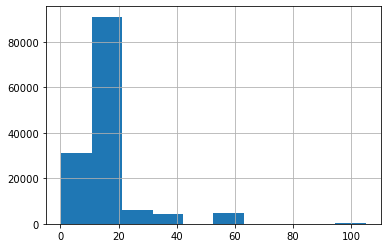

In [56]:
np.sqrt(vis_data.balance_due[vis_data.balance_due > 0]).hist();

Выше мы явно отсекли значения в данных, равные `0`. Если значения все-таки начинаются с `0`, перед взятием логарифма можно прибавить `1` к данным. Логарифм от `1` превратится в `0`.

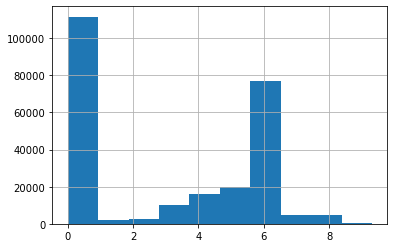

In [57]:
np.log(vis_data.balance_due[vis_data.balance_due >= 0] + 1).hist();

### Correlation plot
Некоторые признаки сильно скоррелированы друг с другом. Это значит, между этими признаками есть некоторая линейная зависимость. Если зависимость большая - часть скоррелированных признаков (не все) следует убрать из выборки, так как они несут избыточную информацию.  
При этом, отсутствие корреляции не означает отсутствие зависимости - между признаками в таком случае может быть сложная нелинейная зависимость.  
Для определения такой зависимости, можно посчитать матрицу корреляции для признаков и построить, например, heatmap, чтобы проще было увидеть зависимость.  
На главной диагонали этой матрицы будут стоять единицы, потому что для признака считается корреляция с самим собой.

In [58]:
import seaborn as sns

In [59]:
corr = vis_data.drop(['violation_zip_code', 'payment_amount', 
                      'clean_up_cost', 
                      'violation_street_number'], axis=1).\
                dropna(axis=1).\
                corr()
cmap = sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ticket_id,admin_fee,state_fee,late_fee,discount_amount,judgment_amount,balance_due
ticket_id,1.00,-0.04,-0.04,-0.01,-0.02,-0.01,0.00
admin_fee,-0.04,1.00,1.00,0.29,0.03,0.32,0.28
state_fee,-0.04,1.00,1.00,0.29,0.03,0.32,0.28
late_fee,-0.01,0.29,0.29,1.00,-0.01,0.99,0.95
discount_amount,-0.02,0.03,0.03,-0.01,1.00,0.04,-0.02
judgment_amount,-0.01,0.32,0.32,0.99,0.04,1.00,0.94
balance_due,0.00,0.28,0.28,0.95,-0.02,0.94,1.00


### Задание 2.10.3
Загрузите данные train.csv, найдите признак, обозначающий баланс. Для приведения данных к более нормальному виду часто используют различные преобразования, например, взятие корня от признака.
Возьмите корень у положительных значений, найдите медианное и среднее значение. В качестве ответа укажите модуль разницы этих значений.

In [60]:
vis_data['balance_due_in_square'] = vis_data['balance_due'].apply(lambda x: x**0.5 if x>0 else None)

temp = abs(vis_data['balance_due_in_square'].mean()-vis_data['balance_due_in_square'].median())
print(round(temp,6))

0.452596


### Задание 2.10.4
Предположим, что вы хотите проанализировать состояние цен на квартиры в нескольких  районах : "Лефортово", "Перово", "Басманное" и "Богородское". Для того, чтобы сравнить цены на квартирах в этих районах, можно использовать визуализацию. На основании полученных диаграмм ответьте на вопросы ниже.

1. В каком районе разброс цен самый большой?
2. В каком районе самая низкая медианная цена?

In [61]:
df = pd.read_csv('data_flats.csv',sep=";")
new_df = df.groupby('sub_area').price_doc.agg(['min','max'])
new_df['diff'] = abs(new_df['min']-new_df['max'])

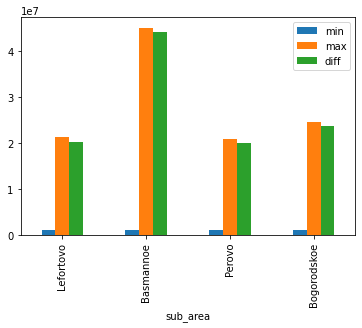

In [62]:
plt.rcParams['figure.figsize'] = (6,4)
new_df.loc[['Lefortovo', 'Basmannoe', 'Perovo', 'Bogorodskoe']].plot(kind = 'bar')


Ответ: Басманово

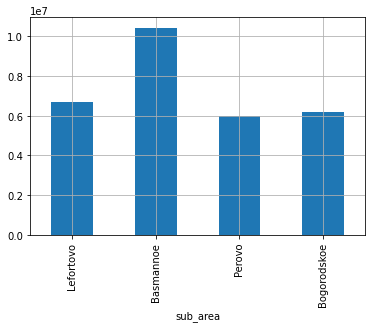

In [63]:
df.groupby('sub_area').price_doc.median().loc[['Lefortovo', 'Basmannoe', 'Perovo', 'Bogorodskoe']].plot(kind = 'bar', grid = True)


Ответ: Перово

### 2.12 Feature Engineering. Практика


Создание новых признаков - трудоемкий процесс, который позволяет значительно повысить точность модели при правильном использовании методов создания новых признаков. Самое большое повышение точности обычно случается после того, как Data Science разработчик погружается в предметную область задачи, потому что это позволяет создавать новые признаки осмысленно.  
Несмотря на это, есть автоматические/полуавтоматические методы создания новых признаков, о которых мы поговорим ниже.  
Для исследования темы создания новых признаков воспользуемся датасетом `vis_data` и дополним его новой информацией:

In [65]:
import numpy as np
import pandas as pd
%matplotlib inline

vis_data = pd.read_csv("train.csv", 
                       encoding = 'ISO-8859-1', 
                       low_memory = False)
vis_data = vis_data.drop(['violation_zip_code', 'clean_up_cost'], axis=1)
latlons = pd.read_csv("latlons.csv")
vis_data = pd.concat([vis_data, latlons], axis=1)

### Ручное создание признаков

Ручное создание признаков требует погружения в предметную область задачи и не всегда гарантирует положительный результат.  
Часто данные приходят без пояснения и есть только сами табличные данные и, если повезет, названия признаков. Нам повезло. Посмотрим на данные и на названия признаков:

In [66]:
vis_data.head(2)

,ticket_id,agency_name,inspector_name,violator_name,violation_street_number,violation_street_name,mailing_address_str_number,mailing_address_str_name,city,state,...,balance_due,payment_date,payment_status,collection_status,grafitti_status,compliance_detail,compliance,address,lat,lon
0,22056,"Buildings, Safety Engineering & Env Department","Sims, Martinzie","INVESTMENT INC., MIDWEST MORTGAGE",2900.0,TYLER,3.0,S. WICKER,CHICAGO,IL,...,305.0,NaN,NO PAYMENT APPLIED,NaN,NaN,non-compliant by no payment,0.0,"4300 rosa parks blvd, Detroit MI 48208",42.346169,-83.079962
1,27586,"Buildings, Safety Engineering & Env Department","Williams, Darrin","Michigan, Covenant House",4311.0,CENTRAL,2959.0,Martin Luther King,Detroit,MI,...,75.0,2005-06-02 00:00:00,PAID IN FULL,NaN,NaN,compliant by late payment within 1 month,1.0,"14512 sussex, Detroit MI",42.394657,-83.194265


In [67]:
vis_data.columns

Index(['ticket_id', 'agency_name', 'inspector_name', 'violator_name',
       'violation_street_number', 'violation_street_name',
       'mailing_address_str_number', 'mailing_address_str_name', 'city',
       'state', 'zip_code', 'non_us_str_code', 'country', 'ticket_issued_date',
       'hearing_date', 'violation_code', 'violation_description',
       'disposition', 'fine_amount', 'admin_fee', 'state_fee', 'late_fee',
       'discount_amount', 'judgment_amount', 'payment_amount', 'balance_due',
       'payment_date', 'payment_status', 'collection_status',
       'grafitti_status', 'compliance_detail', 'compliance', 'address', 'lat',
       'lon'],
      dtype='object')

Судя по названию переменных, это данные о нарушителях, которые должны платить штраф за какое-то правонарушение.  
Есть переменная compliance, которая принимает значения `0`, `1` и `None`. Так как описания нет, мы можем предположить, что 0 - нарушитель заплатил штраф, 1 - не заплатил. Что в данном контексте означает None понять трудно, возможно, это пропуски, которые следует просто выбросить.  
Кроме изначальных признаков нам также дали ширину и долготу. Также, есть признак `city`. Что можно сделать с таким набором признаков? Например, можно посмотреть расстояние от точки правонарушения до центра города, в котором произошло нарушение. Давайте сначала исследуем, какие города представлены в выборке:

In [69]:
# Можно посмотреть на value_counts, не ограничивая вывод, 
# чтобы увидеть, как много там разных значений
vis_data.city.value_counts()[:10]

DETROIT             136936
SOUTHFIELD           13436
Detroit              10496
detroit               4183
DEARBORN              3637
FARMINGTON HILLS      2329
OAK PARK              2216
WARREN                2000
DET                   1657
W. BLOOMFIELD         1635
Name: city, dtype: int64

Видно, что подавляюще большую часть значений составляет `DETROIT`. Также, чуть ниже видны `Detroit` и `detroit`.  
Название города с самым большим количеством нарушений записано по-разному в данных. Возможно, некоторые другие города тоже записаны в разном регистре.  

In [70]:
vis_data.city = vis_data.city.apply(lambda x: x.lower())

In [71]:
vis_data.city.value_counts()[:10]

detroit             151621
southfield           14760
dearborn              4017
farmington hills      2508
oak park              2432
warren                2150
det                   1928
livonia               1798
w. bloomfield         1795
redford               1718
Name: city, dtype: int64

Теперь мы более точно видим, что большинство преступлений (из представленных в выборке) совершается в Детройте.  
Возможно, информативным признаком будет расстояние от места правонарушения до центра Детройта.  
Теперь давайте найдем для каждого нарушения, для которого есть широта и долгота, его расстояние до центра Детройта со следующими координатами:
 - широта: 42.331429
 - долгота: -83.045753

In [73]:
from math import radians, sin, cos, asin, sqrt

def haversine(lon1, lat1, lon2, lat2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2) ** 2
    c = 2 * asin(sqrt(a))
    earth_radius = 6371 
    return c * earth_radius

vis_data['distance'] = vis_data.apply(lambda row: 
                                      haversine(lon1 = -83.045753, 
                                                lat1 = 42.331429,
                                                lon2 = row['lon'], 
                                                lat2 = row['lat']), 
                                      axis=1)

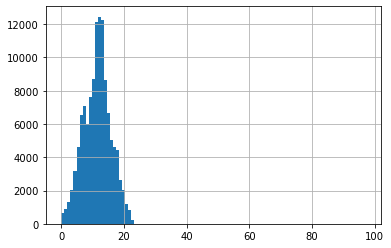

In [74]:
vis_data['distance'][vis_data['distance'] < 100].hist(bins=100);

### Создание полиномиальных признаков

Теперь рассмотрим более механические и менее интеллектуальные способы создать признаки. Новые признаки можно создавать, просто перемножением и делением старых признаков друг на друга.  
Кроме этого, можно брать один признак и возводить его, например, в квадрат или брать из него корень. То есть, в более общем виде, можно создать новый признак из старого, возведя все значения старого признака в дробную степень.

In [75]:
from sklearn.preprocessing import PolynomialFeatures

Класс `PolynomialFeatures` из библиотеки `sklearn` принимает на вход набор признаков и на выходе отдает полиномиальные признаки, сгенерированные на основе входных и со степенью меньше либо равной указанной.  
Например, для признаков `[a, b]` и степени `2` он вернет `[1, a, b, a^2, ab, b^2]`.

In [76]:
pf = PolynomialFeatures(2)

In [77]:
poly_features = pf.fit_transform(vis_data[['balance_due', 'payment_amount']])
poly_features

array([[1.0000e+00, 3.0500e+02, 0.0000e+00, 9.3025e+04, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 7.5000e+01, 7.8000e+02, 5.6250e+03, 5.8500e+04,
        6.0840e+05],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       ...,
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00],
       [1.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00]])

In [78]:
poly_features.shape

(250306, 6)

### Dummy-переменные

Когда мы говорим о категориальных признаках, есть два основных случая:
 - Категориальный признак содержит строки, никакая модель не примет их на вход, потребуется некоторое преобразование
 - Категориальный признак содержит числа. В таком случае, в принципе, можно никак не трогать этот признак, но это будет неправильно с точки зрения логики обучения модели.
 
Рассмотрим второй случай: есть признак "тип животного", который принимает `n` различных значений: значение 0, если животное - кошка, 1 - если тигр, 2 - если пантера. В отличие от `continuous` признаков, то есть, имеющих некоторый порядок, категориальные признаки такого порядка не имеют - мы не можем строго сравнить тигра и пантеру, это просто разные сущности. Некоторые алгоритмы могут работать с категориальными признаками, некоторые - нет.  
Естественной предобработкой для таких признаков является создание dummy-переменных на основе категориального признака, то есть, создание `n` признаков-индикаторов. Каждый из индикаторов равен 1 тогда, когда в изначальном примере выбрано соответствующее значение и 0 иначе. 
 

Преобразуем признак `state` в dummy-переменные и посмотрим его `shape`:

In [79]:
pd.get_dummies(vis_data.state).shape

(250306, 59)

Теперь преобразуем признак `city` в dummy-переменные. Для этого сначала требуется сделать небольшую предобработку, чтобы сократить количество уникальных значений в этом признаке. Для начала, найдем города, которые описывают большинство (`90%`) примеров:

In [80]:
cities_with_freqs = list(vis_data.city.value_counts())

In [81]:
top_cities_count = int(np.percentile(cities_with_freqs, 90))
top_cities_count

14

Теперь оставим только этот топ городов, остальные города назовем `other`:

In [82]:
all_cities = vis_data.city.value_counts().index
top_cities = list(all_cities)[:top_cities_count]
cities_to_throw_away = list(set(all_cities) - set(top_cities))
vis_data.loc[vis_data['city'].isin(cities_to_throw_away), 
             'city'] = 'other'

Теперь количество уникальных значений в признаке `city` сократилось до:

In [83]:
len(vis_data.city.value_counts())

15

Можем создать dummy-признаки для этой переменной:

In [85]:
pd.get_dummies(vis_data.city, drop_first=True).head()

,dearborn,det,detroit,eastpointe,farmington hills,livonia,oak park,other,redford,southfield,troy,w. bloomfield,warren,west bloomfield
0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,0,0


### Работа с датой/временем

`Pandas` поддерживает работу с датами.  
[Больше про работу с временем в pandas](https://codeburst.io/dealing-with-datetimes-like-a-pro-in-pandas-b80d3d808a7f)  
Выберем признак, содержащий время, уберем пропуски и преобразуем его в специальный формат для работы со временем:

In [86]:
datetime_vals = pd.to_datetime(vis_data.payment_date.dropna())

In [87]:
datetime_vals.head()

1    2005-06-02
11   2005-03-17
15   2005-02-11
18   2005-03-18
19   2005-03-18
Name: payment_date, dtype: datetime64[ns]

Теперь к этим значениям можно обращаться для определения дня, месяца или года:

In [89]:
datetime_vals[1].month

6

Кроме этого, можно вытаскивать такие признаки, как день недели:

In [90]:
datetime_vals[1].weekday()

3

Отсчет начинается с понедельника и с нуля, поэтому мы понимаем, что это четверг.  
Почему это может быть важным признаком? Например, в текущем наборе данных можно использовать такой признак как будний день/выходной, чтобы определить, когда чаще совершают правонарушения:

In [92]:
dt_issued_date = pd.to_datetime(vis_data.ticket_issued_date)
vis_data['is_weekend'] = dt_issued_date.dt.weekday > 4
vis_data['wd'] = dt_issued_date.dt.weekday

Здесь мы воспользовались специальным селектором `dt`, который для удобства содержит методы для работы со временем в `pandas`.  

### Статистики по наборам признаков

Одним из интересных способов использовать данные для создания новых признаков является расчет различных статистик по данным.  
Примерами статистик могут быть минимум, максимум, стандартное отклонение и многие другие.  
Этот способ работает, если в данных содержится, помимо прочих признаков, некоторое подобие временных рядов.  
Например, примеры - это продукты, а зависимая переменная - купит ли покупатель этот продукт. Признаками, которые нас интересуют, будут стоимость данного продукта за 2015, 2016 и 2017 годы. В таком случае мы можем взять среднее, медиану, максимум, минимум и что угодно еще по этим трем столбцам и получить множество новых признаков.  
Не факт, что данные признаки будут полезны, это мы увидим на этапе валидации и тестирования. Но часто такие признаки действительно оказываются полезными.